# Data Analysis Using Project OpenAccess-CCLE

In [1]:
api = 'https://gen3.datacommons.io/' 
cred = '/Users/bowenbao/Documents/Project/credentials.json'
import pandas as pd
import sys
project_dir = "/Users/bowenbao/Documents/Project/"
sys.path.insert(1, '{}'.format(project_dir))
from gen3.auth import Gen3Auth 
from gen3.submission import Gen3Submission 
#from gen3.analysis import Gen3Analysis 
auth = Gen3Auth(api, refresh_file=cred)
sub = Gen3Submission(api, auth) 
%run /Users/bowenbao/Documents/Project/gen3/analysis.py

In [2]:
analysis = Gen3Analysis(api, auth) 

In [ ]:
#Rerun 
%run /Users/bowenbao/Documents/Project/gen3/analysis.py
analysis = Gen3Analysis(api, auth) 

In [3]:
#Set viewing options for tables
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
#Set viewing options to enlarge certain graphs
import matplotlib.pyplot as plt

### Dataset used is the 'Lab Test' Node within project 'OpenAccess-CCLE'

In [4]:
lab = pd.read_csv('lab_test.tsv',sep='\t') 
lab.head(10)

/Users/bowenbao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24,49,50,53,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,type,id,project_id,submitter_id,test_type,EC50,IC50,abnormal_test_action_taken,abnormal_test_exp_meds,abnormal_test_health_risk,abnormal_test_nonexp_meds,abnormal_test_severity,activity_area,analyte,assay_kit_name,assay_kit_vendor,assay_kit_version,blood_test_result_flag,chemistry_test_interpretation,comments,concentration,days_from_collection_to_test,days_to_abnormal_test,days_to_test,dose,equipment_manufacturer,equipment_model,fit_type,hematology_test_interpretation,high_range,lab_result_changed,low_range,max_activity,sample_composition,sample_composition_other,slope,somatos_srif,subject_ids,test_code,test_name,test_out_of_range_alert,test_panel,test_project_id,test_result,test_status,test_units,test_units_other,test_value,test_value_mean,test_value_median,test_value_sd,text_if_repeated,urine_test_interpretation,visit_id,which_visit_being_performed,year_of_abnormal_test,year_of_test_form,year_tests_obtained,drugs.id,drugs.submitter_id,samples.id,samples.submitter_id,subjects.id,subjects.submitter_id
0,lab_test,db55034a-9a6c-4ef2-831c-caa48727589c,OpenAccess-CCLE,SJSA1_BONE_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,None,None,0.833,AZD6244,None,None,None,None,None,None,None,None,None,None,None,None,None,Constant,None,None,None,None,-11.64386082,BONE,SJSA1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,bbba10ed-54dd-4d53-a732-173226a7c2f6,SJSA1_BONE,1ad24524-e13b-4d57-9299-eb81b9002d56,SJSA1_BONE_subject
1,lab_test,d728ccbd-a2bf-44ce-a24c-b8776817e170,OpenAccess-CCLE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AZD6...,Drug Response Summary,0.379500955,8,None,None,None,None,None,1.2336,AZD6244,None,None,None,None,None,None,None,None,None,None,None,None,None,Sigmoid,None,None,None,None,-35.05550766,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ALLSIL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,89c1b12e-a8a5-4d62-8c9d-db1dd41aeb7a,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,02c50d02-2d60-4d23-890d-526768f154a7,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_subject
2,lab_test,5b2aa4c0-42e6-4e4c-a3b3-bfcef3919374,OpenAccess-CCLE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AZD624...,Drug Response Summary,8.296634545,8,None,None,None,None,None,1.6147,AZD6244,None,None,None,None,None,None,None,None,None,None,None,None,None,Sigmoid,None,None,None,None,-42.45096588,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,1423aa74-03ba-4c21-8c15-8b1d28166f44,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,963739e9-3cf5-4d12-9c39-1e8251161c07,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_subject
3,lab_test,1b87664f-e3d9-4dbd-8e9b-58478c17bee4,OpenAccess-CCLE,SKBR3_BREAST_AZD6244_sumdrug,Drug Response Summary,None,8,None,None,None,None,None,0,AZD6244,None,None,None,None,None,None,None,None,None,None,None,None,None,Constant,None,None,None,None,8.363933563,BREAST,SKBR3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,882c35f3-5875-42fa-bde3-011c240ceb79,SKBR3_BREAST,44d16f91-694b-4142-9a38-439eb4e0c101,SKBR3_BREAST_subject
4,lab_test,de212dc3-7127-4976-92a6-4dc9e7acd1c8,OpenAccess-CCLE,AN3CA_ENDOMETRIUM_AZD6244_sumdrug,Drug Response Summary,2.69486618,8,None,None,None,None,None,0.6207,AZD6244,None,None,None,None,None,None,None,None,None,None,None,None,None,Sigmoid,None,None,None,None,-30.28681564,ENDOMETRIUM,AN3CA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,71b12afa-7354-4dc7-9d65-444b51242094,AN3CA_ENDOMETRIUM,08b27da2-8af7-4b8b-8cbc-4c505d00f4f3,AN3CA_ENDOMETRIUM_subject
5,lab_test,ccd9ed46-e5e9-4e18-89e4-f2f9b9bde094,OpenAccess-CCLE,ASPC1_PANCREAS_AZD6244_sumdrug,Drug Response Summary,2.141568422,1.271577716,None,None,None,None,None,2.1312,AZD6244,None

In [ ]:
lab['IC50'].unique()
#lab.dtypes

## Plot a bar graph of categorical variable counts in a dataframe

### The count of categories by sample composition

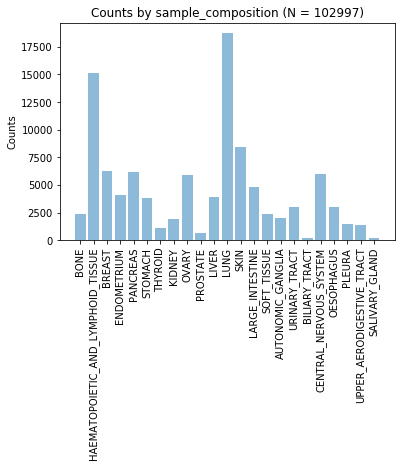

In [5]:
analysis.plot_categorical_property(lab, "sample_composition") 

## Plot a bar graph of categorical variable counts in sorted order

### Lung and lymphoid tissue make up most of the data 

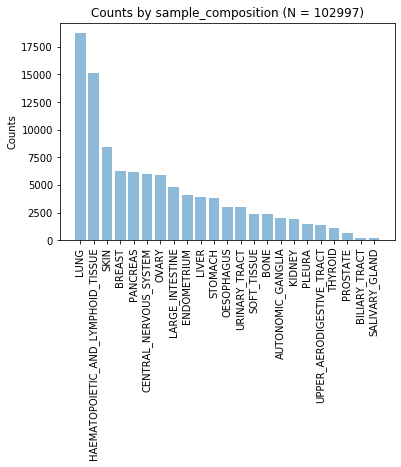

In [6]:
analysis.plot_categorical_property_by_order(lab, "sample_composition")

### Create a pie chart of counts within a categorical property

In [ ]:
#Enlarge graph
plt.rcParams['figure.figsize'] = [10, 10]

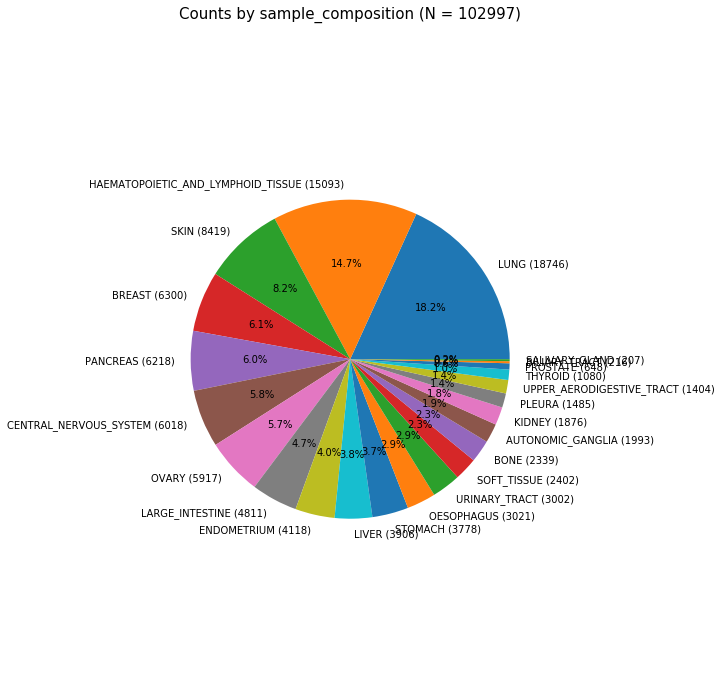

In [46]:
analysis.pie_categorical_property_count(lab, "sample_composition")

### A majority of the data is not fitted

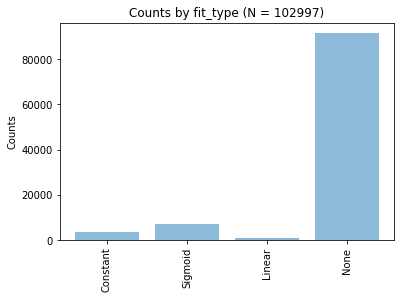

In [8]:
analysis.plot_categorical_property(lab, "fit_type") 

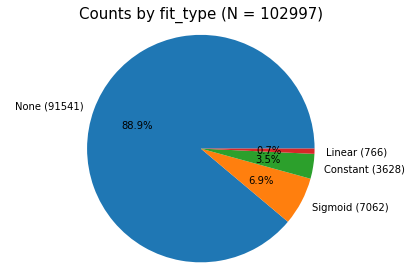

In [9]:
analysis.pie_categorical_property_count(lab, "fit_type")

### Most of the data is drug induced

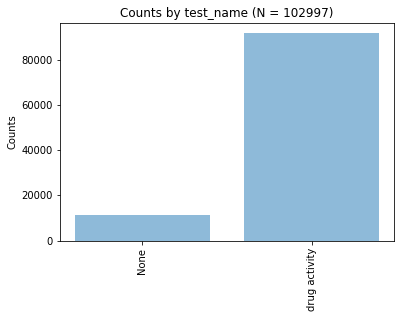

In [10]:
analysis.plot_categorical_property(lab, "test_name")

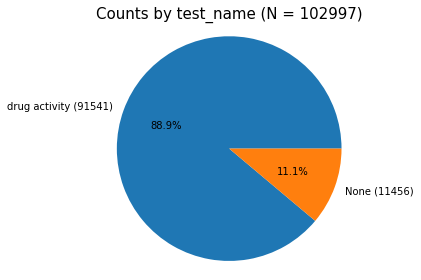

In [12]:
analysis.pie_categorical_property_count(lab, "test_name")

## Plot a histogram the count distribution of a numeric variable

### The test value median is centered around zero.

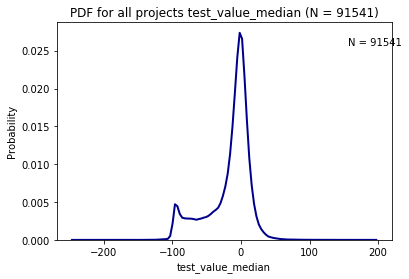

In [13]:
analysis.plot_numeric_property(lab, "test_value_median")

### This distribution is also illustrated using box plots

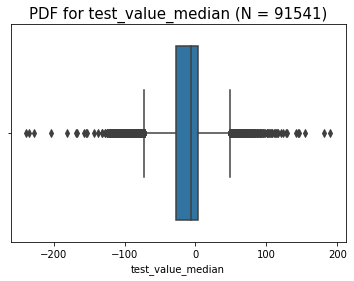

In [14]:
analysis.boxplot_numeric_property(lab, "test_value_median")

### Test value standard deviation is generally 40 or less. 

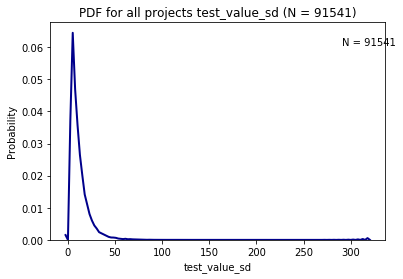

In [15]:
analysis.plot_numeric_property(lab, "test_value_sd")

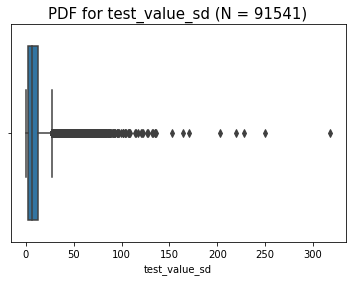

In [16]:
analysis.boxplot_numeric_property(lab, "test_value_sd")

### Majority of max activity is between -100 to 0. 

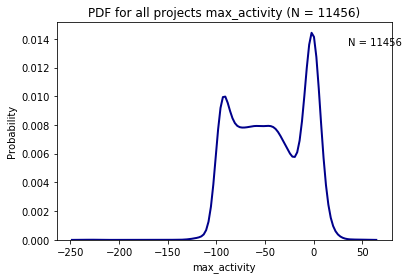

In [17]:
analysis.plot_numeric_property(lab, "max_activity")

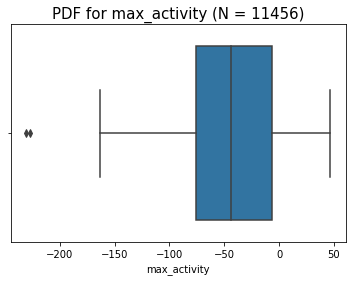

In [18]:
analysis.boxplot_numeric_property(lab, "max_activity")

### IC50 is centered around 0 and 8.

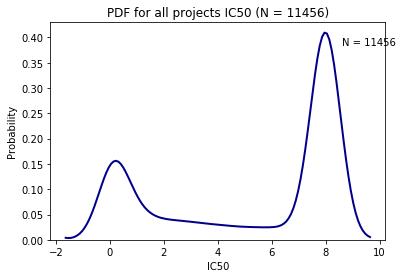

In [21]:
analysis.plot_numeric_property(lab, "IC50")

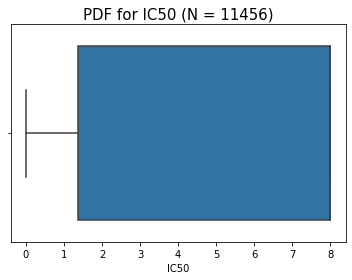

In [20]:
analysis.boxplot_numeric_property(lab, "IC50")

## Violin plot and Box plot 

### Count distribution of a numeric property by a categorical property

### Distribution of activity area by organ

In [58]:
#Enlarge graph
plt.rcParams['figure.figsize'] = [60, 10]

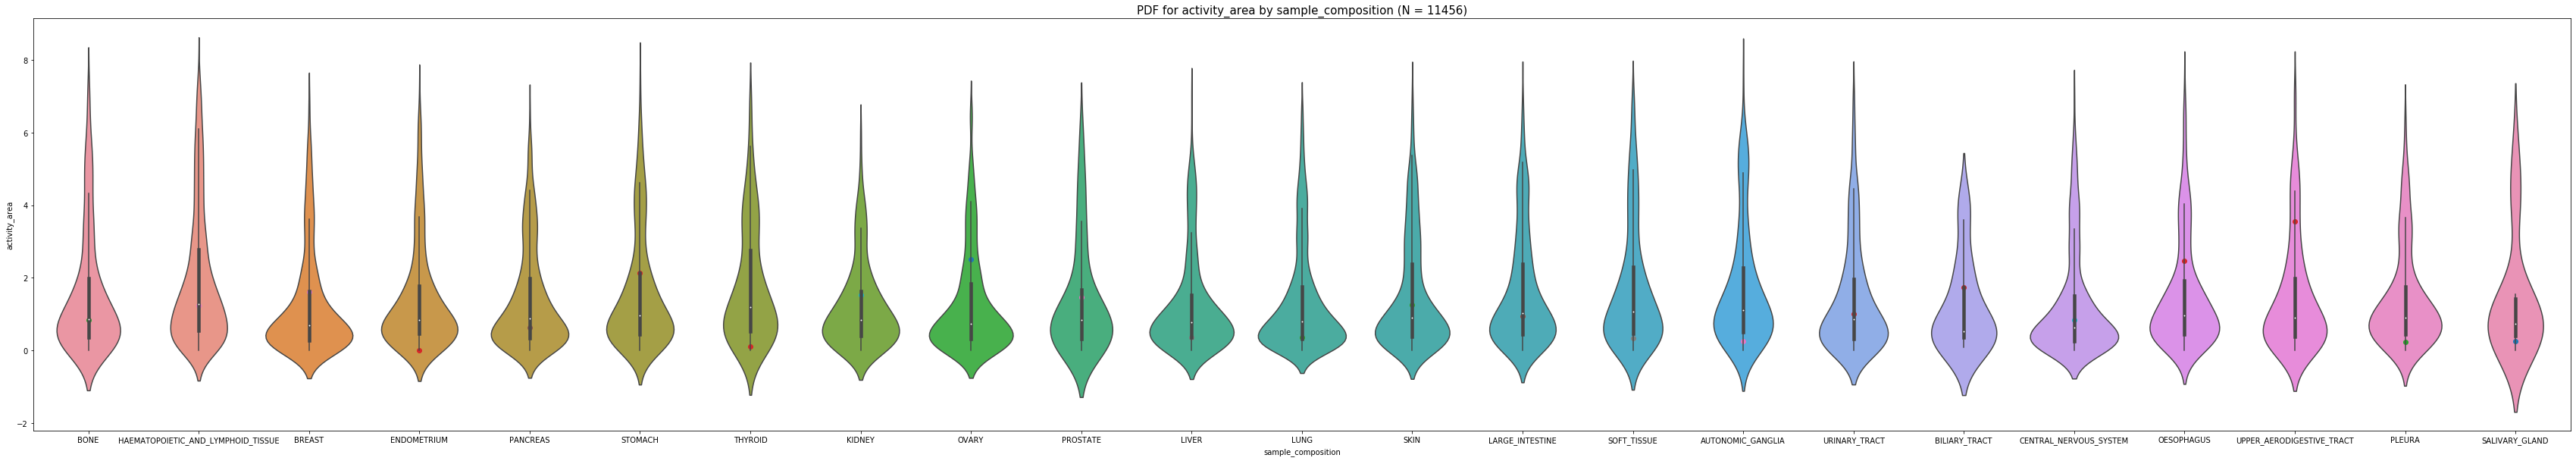

In [59]:
analysis.plotviolin_numeric_property_by_categorical_property(df = lab, numeric_property = "activity_area", categorical_property = "sample_composition")

### We plot the same distributions using boxplots 

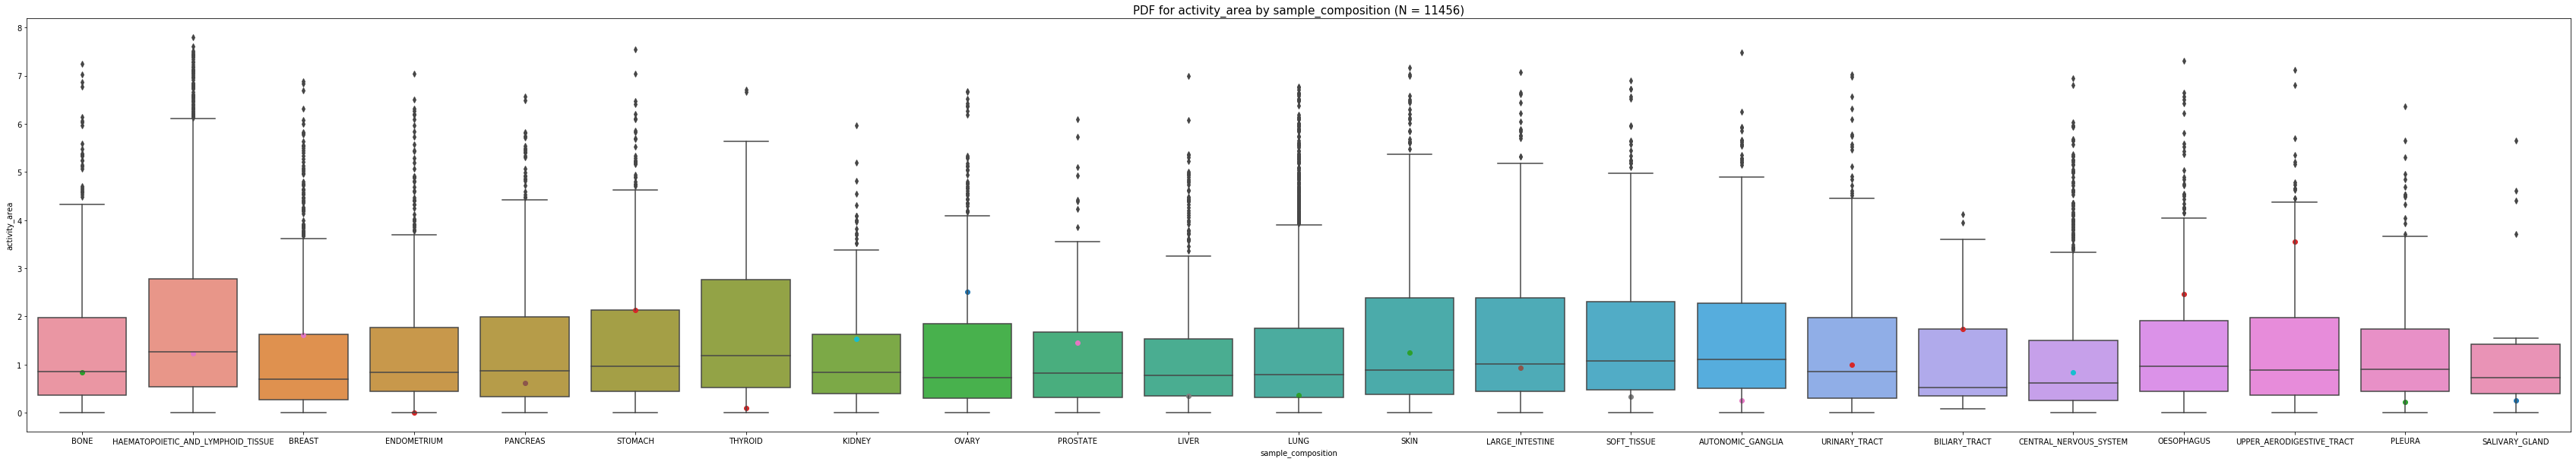

In [60]:
analysis.boxplot_numeric_property_by_categorical_property(df = lab, numeric_property = "activity_area", categorical_property = "sample_composition")

### The median test value is centered around 0 for the first few patient visits and drops in the later visits. The standard deviation also stretches negative overtime.

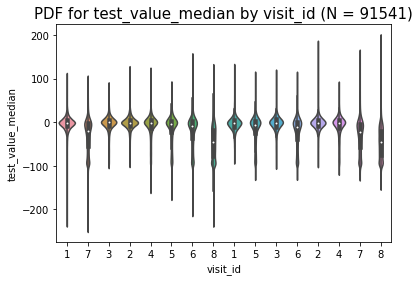

In [24]:
analysis.plotviolin_numeric_property_by_categorical_property(df = lab, numeric_property = "test_value_median", categorical_property = "visit_id")

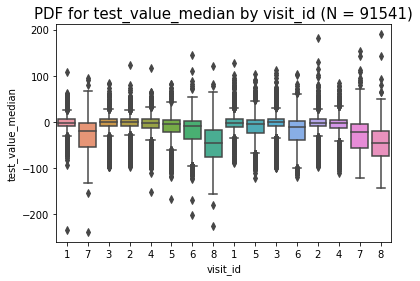

In [25]:
analysis.boxplot_numeric_property_by_categorical_property(df = lab, numeric_property = "test_value_median", categorical_property = "visit_id")

### Standard deviation is the highest for the first few visits, then drops and increases again for the last few visits, indicating the biggest variance in the first and last few patient visits.

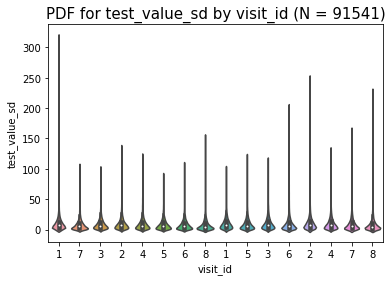

In [26]:
analysis.plotviolin_numeric_property_by_categorical_property(df = lab, numeric_property = "test_value_sd", categorical_property = "visit_id")

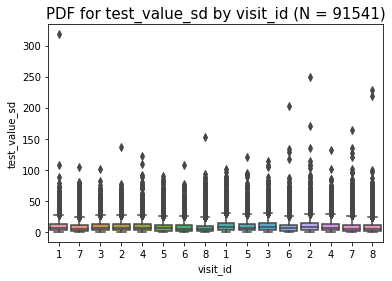

In [27]:
analysis.boxplot_numeric_property_by_categorical_property(df = lab, numeric_property = "test_value_sd", categorical_property = "visit_id")

### The activity area distribution is most concentrated by the 'constant' fit type, followed by 'linear' then sigmoid.

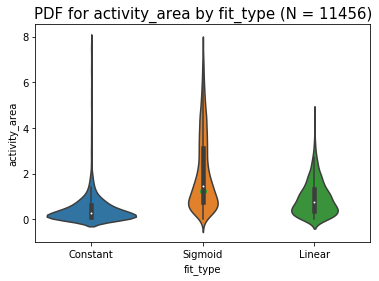

In [28]:
analysis.plotviolin_numeric_property_by_categorical_property(df = lab, numeric_property = "activity_area", categorical_property = "fit_type")

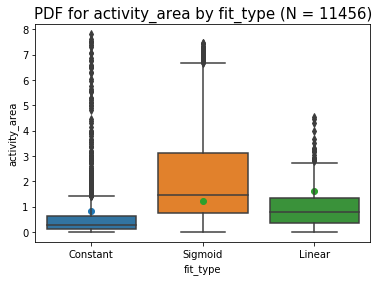

In [29]:
analysis.boxplot_numeric_property_by_categorical_property(df = lab, numeric_property = "activity_area", categorical_property = "fit_type")

## Scatter Plots

### Create a Scatter Plot comparing the distribution of two numerical variables

In [31]:
import warnings
warnings.filterwarnings("ignore") 

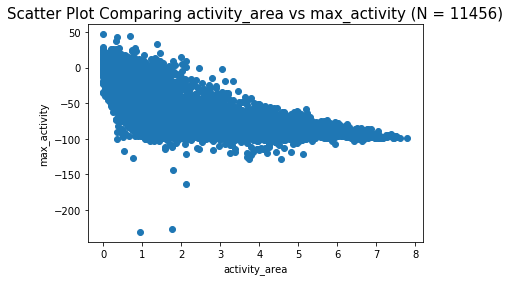

In [32]:
analysis.scatter_numeric_by_numeric(lab, "activity_area", "max_activity")

### Distribution of activity area and max activity color coded by organ

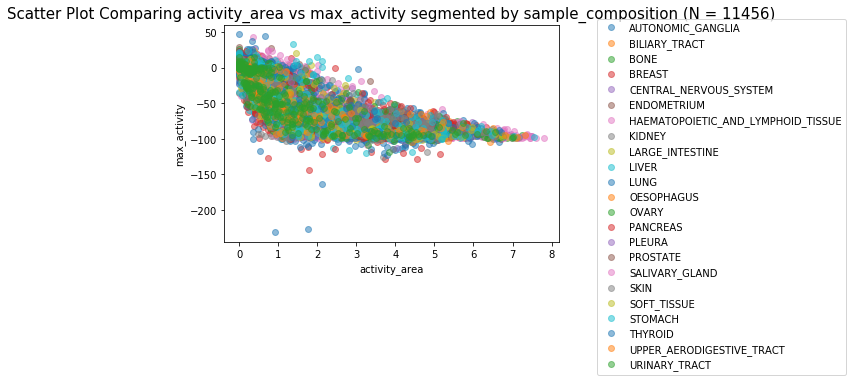

In [33]:
analysis.scatter_numeric_by_numeric_by_category(lab, "activity_area", "max_activity", "sample_composition")

### Distribution of test value median and standard deviation color coded by organ

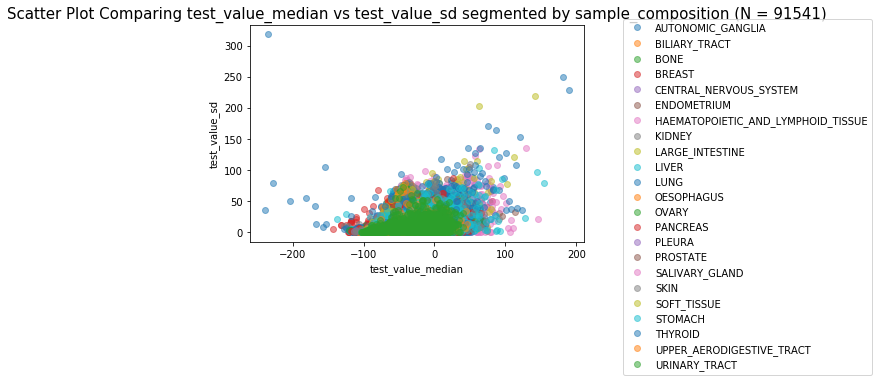

In [34]:
analysis.scatter_numeric_by_numeric_by_category(lab, "test_value_median", "test_value_sd", "sample_composition")

### Distribution of EC50 and activity area by organ

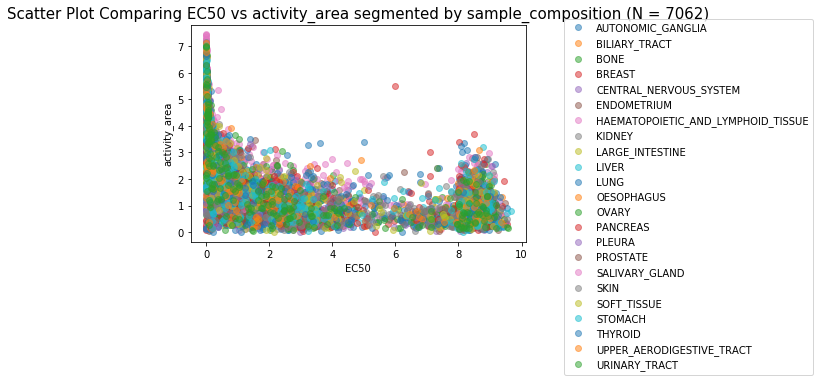

In [35]:
analysis.scatter_numeric_by_numeric_by_category(lab, "EC50", "activity_area", "sample_composition")

### Distribution of EC50 and IC50 by organ

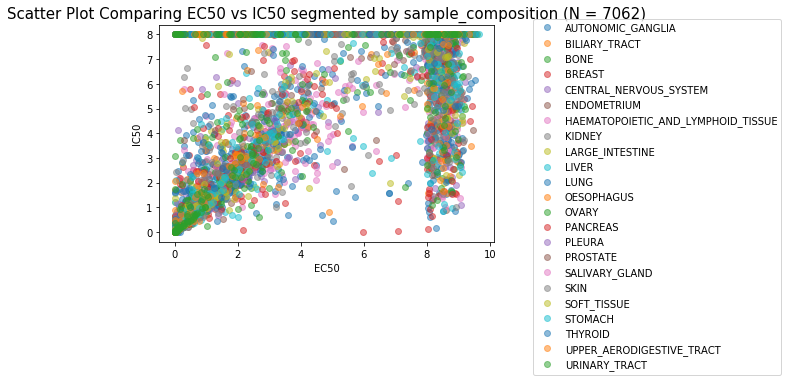

In [36]:
analysis.scatter_numeric_by_numeric_by_category(lab, "EC50", "IC50", "sample_composition")

## Display Tables

### Displays the counts of each category in a categorical variable

In [37]:
analysis.property_counts_by_project("sample_composition", lab) 

,Project,Total,LUNG,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BREAST,SOFT_TISSUE,BILIARY_TRACT,AUTONOMIC_GANGLIA,LIVER,CENTRAL_NERVOUS_SYSTEM,PLEURA,PANCREAS,OVARY,OESOPHAGUS,SKIN,PROSTATE,UPPER_AERODIGESTIVE_TRACT,THYROID,URINARY_TRACT,LARGE_INTESTINE,BONE,KIDNEY,ENDOMETRIUM,STOMACH,SALIVARY_GLAND
0,OpenAccess-CCLE,102997,18746,15093,6300,2402,216,1993,3906,6018,1485,6218,5917,3021,8419,648,1404,1080,3002,4811,2339,1876,4118,3778,207


### Displays the counts of each category in a categorical variable in table form

In [38]:
analysis.property_counts_table("sample_composition", lab)

,sample_composition,count
11,LUNG,18746
1,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,15093
12,SKIN,8419
2,BREAST,6300
4,PANCREAS,6218
18,CENTRAL_NERVOUS_SYSTEM,6018
8,OVARY,5917
13,LARGE_INTESTINE,4811
3,ENDOMETRIUM,4118
10,LIVER,3906


In [61]:
analysis.property_counts_table("visit_id", lab)

,visit_id,count
0,None,11456
16,8,5988
1,1,5877
4,2,5873
3,3,5826
15,7,5824
5,4,5815
6,5,5781
12,6,5733
7,6,5723
